# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape
print(f"the total number of rows are:",df.shape[0])
print(f"the total number of columns are:",df.shape[1])

the total number of rows are: 1898
the total number of columns are: 9


#### Observations:
The dataset contains 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Out of 1898 entries, there are non-null values. Since there are no missing values, the dataset is ready for analysis. For deeper analysis, categorical values can be converted to numerical values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
min_prep_time = df.food_preparation_time.min()
avg_prep_time = df.food_preparation_time.mean()
max_prep_time = df.food_preparation_time.max()

print(f"The minimum time it takes for food to be prepared once an order is placed is:", min_prep_time,"minutes")
print(f"The average time it takes for food to be prepared once an order is placed is:",avg_prep_time,"minutes")
print(f"The maximum time it takes for food to be prepared once an order is placed is:",max_prep_time,"minutes")

The minimum time it takes for food to be prepared once an order is placed is: 20 minutes
The average time it takes for food to be prepared once an order is placed is: 27.371970495258168 minutes
The maximum time it takes for food to be prepared once an order is placed is: 35 minutes


#### Observations:
The food preparation time is fairly consistent with most orders taking between 20 to 31 minutes to prepare. The longest time it takes to prepare the food is 35 minutes. The delivery time is also stable with not much variability.

### **Question 5:** How many orders are not rated?

In [ ]:
df.rating.value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
unrated_orders = df[df.rating=='Not given']
print(f" the number of unrated orders is", len(unrated_orders))

 the number of unrated orders is 736


#### Observations:
There are 736 unrated orders out of 1898 orders, representing 38.78% of the total orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
# Write the code here
df.nunique()

,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,4
food_preparation_time,16
delivery_time,19


CUISINE TYPE

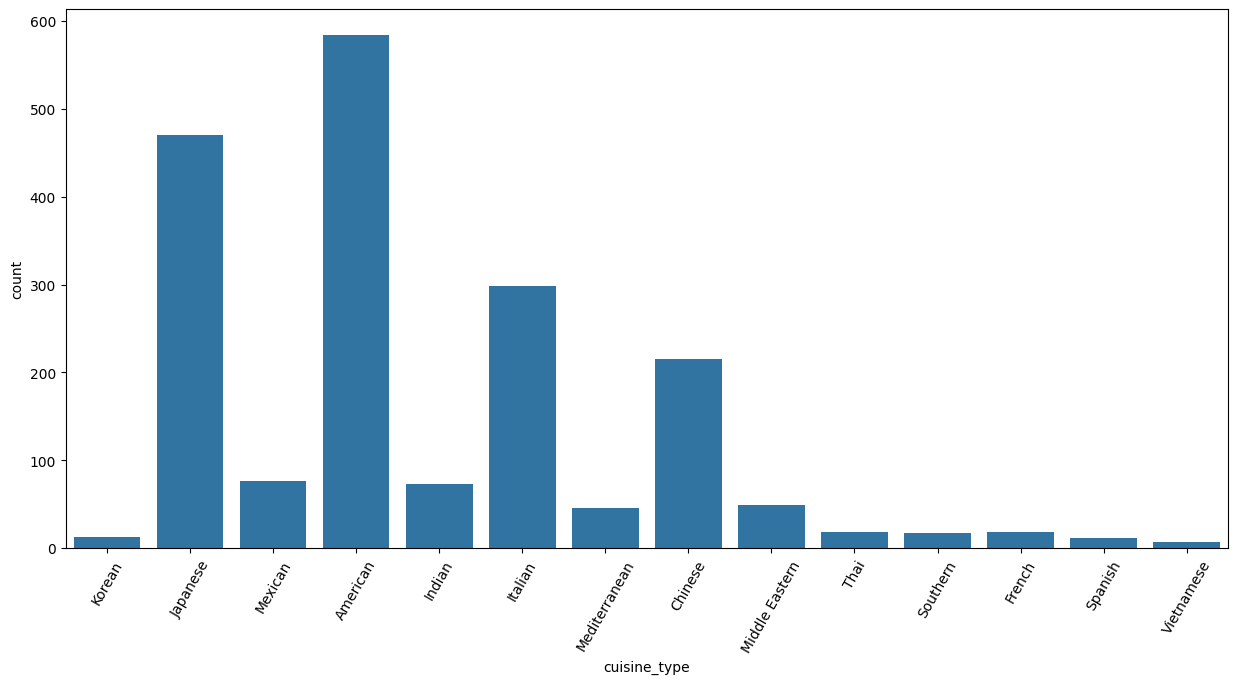

In [ ]:
# Countplot of Cuisine Type
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=60)
plt.show()

OBSERVATION:
AMERICAN CUISINE IS THE MOST PREVALENT IN THE DATASET, FOLLOWED BY JAPANESE AND ITALIAN.

ORDER COST

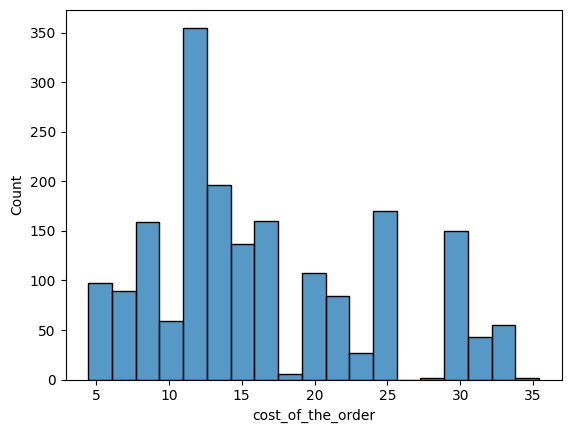

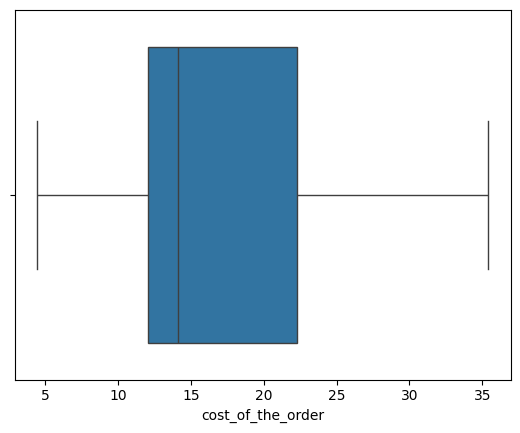

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

OBSERVATIONS:
MOST ORDERING COSTS RANGE BETWEEN $11 AND $12. THE MEDIAN COST IS AROUND $14. PLUS, THERE ARE NO OUTLIERS.

FOOD PREPARATION TIME

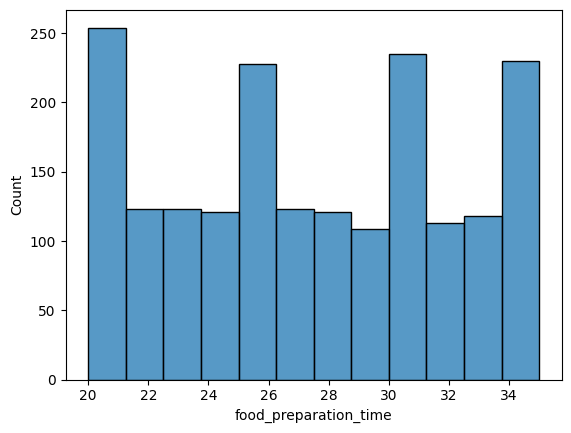

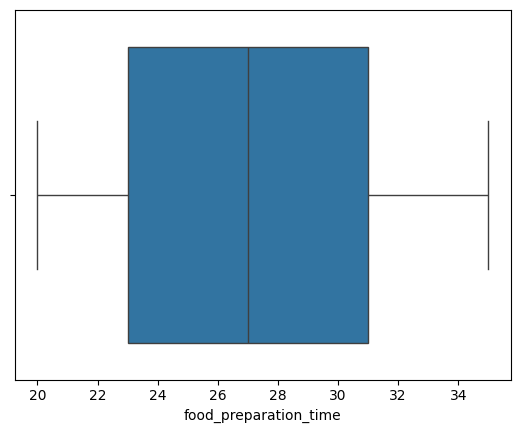

In [ ]:
# Historgram of Food Preparation Time
sns.histplot(data=df,x='food_preparation_time')
plt.show()

sns.boxplot(data=df,x='food_preparation_time')
plt.show()

OBSERVATIONS: FOOD PREP TIME VARIES ACROSS ORDERS. THERE ARE ALSO NO OUTLIERS.

DELIVERY TIME

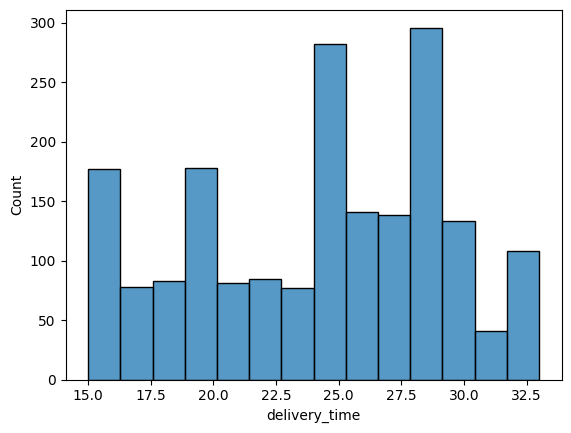

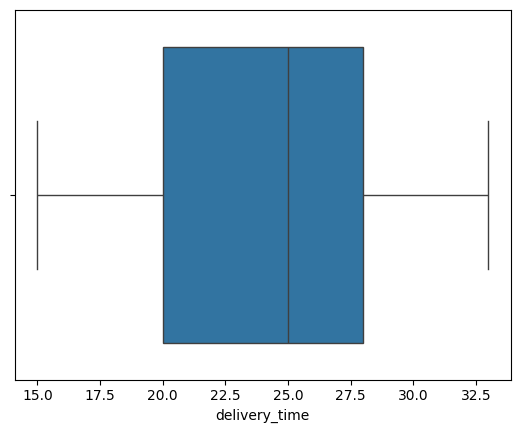

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show()

sns.boxplot(data=df,x='delivery_time')
plt.show()

OBSERVATIONS:
DELIVERY TIME VARY ACROSS ALL ORDERS. THE MEDIAN TIME IS 25 MINUTES. NO OUTLIERS DETECTED.

DAY OF THE WEEK COUNT

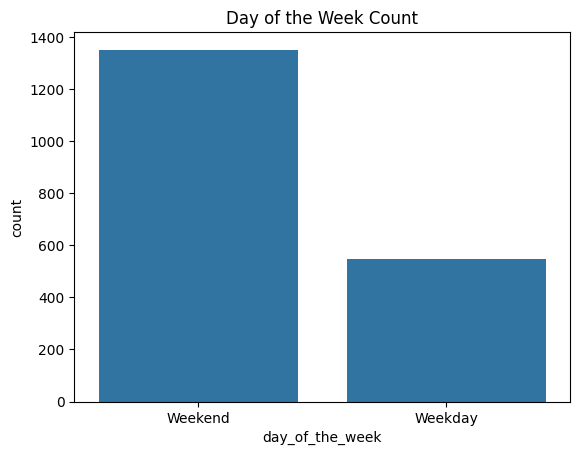

In [ ]:
# Countplot of Day of the Week
sns.countplot(data=df,x='day_of_the_week')
plt.title('Day of the Week Count');

OBSERVATIONS:
WEEKEND HAS MORE ORDERS THAN WEEKDAY, WHICH MIGHT INDICATED THAT CUSTOMERS ARE MORE LIKELY TO STAY AT HOME THAN TO GO OUT.

RATING COUNT

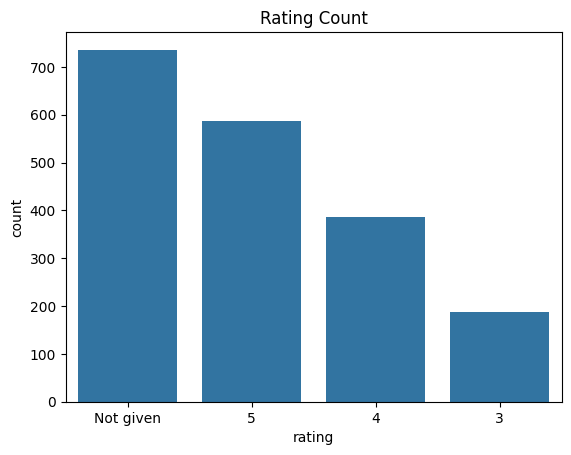

In [ ]:
# Countplot of Rating
sns.countplot(data=df,x='rating', order=df['rating'].value_counts().index)
plt.title('Rating Count');

OBSERVATIONS:
SURPRISINGLY, THERE ARE A LOT OF INSTANCES WHERE RATINGS AREN'T GIVEN. AS FOR GIVEN RATINGS, RATINGS OF 5 ARE THE MOST PREVALENT.

RESTAURANT COUNT

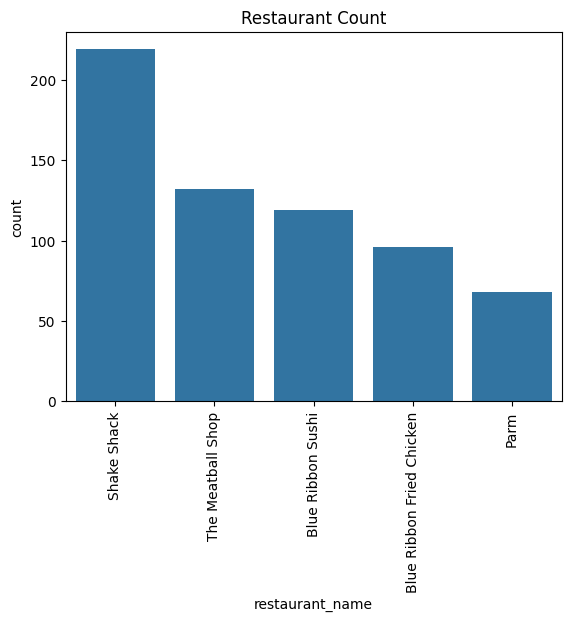

In [ ]:
# Restaurant Countplot
sns.countplot(data=df,x='restaurant_name', order=df['restaurant_name'].value_counts().head().index)
plt.title('Restaurant Count')
plt.xticks(rotation=90);

OBSERVATIONS:
BASED ON THE TOP 5 RESTAURANTS, SHAKE SHACK IS THE MOST POPULAR, WHEREAS PARM IS THE LEAST.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df.restaurant_name.value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Rushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df2=df[df.day_of_the_week=='Weekend']
df2.cuisine_type.value_counts().head(5)


,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
The most popular cuisine on weekends is American, followed by Japanese and Italian.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
len(df[df.cost_of_the_order>20])/len(df)*100

29.24130663856691

#### Observations:
29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df.delivery_time.mean()

24.161749209694417

#### Observations:
The mean delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The total of number of orders cost over 20 dollars is 555 as this constitutes 29.24% of the dataset.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

CUISINE VS COST OF ORDER

ORDER COST VS CUISINE TYPE

<ipython-input-82-791299578f4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


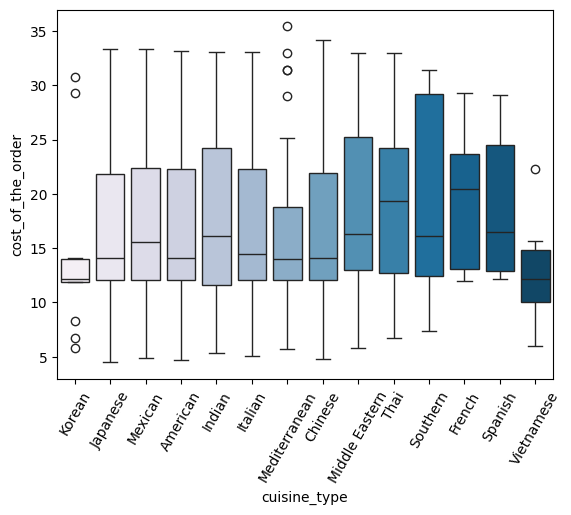

<Figure size 1500x700 with 0 Axes>

In [ ]:
# Observation on Cost of orders per cuisine type
sns.boxplot( x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.figure(figsize=(15,7))
plt.show()

OBSERVATION:
TOP 5 MOST POPULAR CUISINE TYPES - AMERICAN, JAPANESE, ITALIAN, CHINESE, MEXICAN - HAVE A MEDIAN ORDER COST OF LESS THAN $16.

HEAT MAP

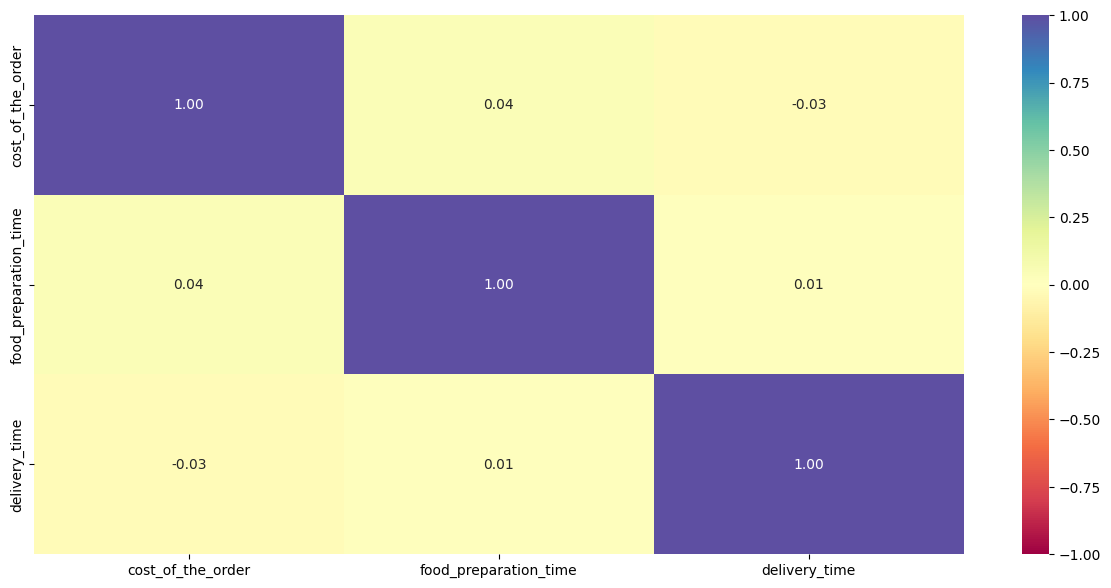

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

OBSERVATIONS:
THERE ARE NO STRONG CORRELATION BETWEEN THE VARIABLES - ORDER COST, PREPARATION TIME, AND DELIVERY TIME - WHICH ARE INDEPENDENT OF EACH OTHER.

NO. OF ORDERS BY RESTAURANT VS DAY OF THE WEEK

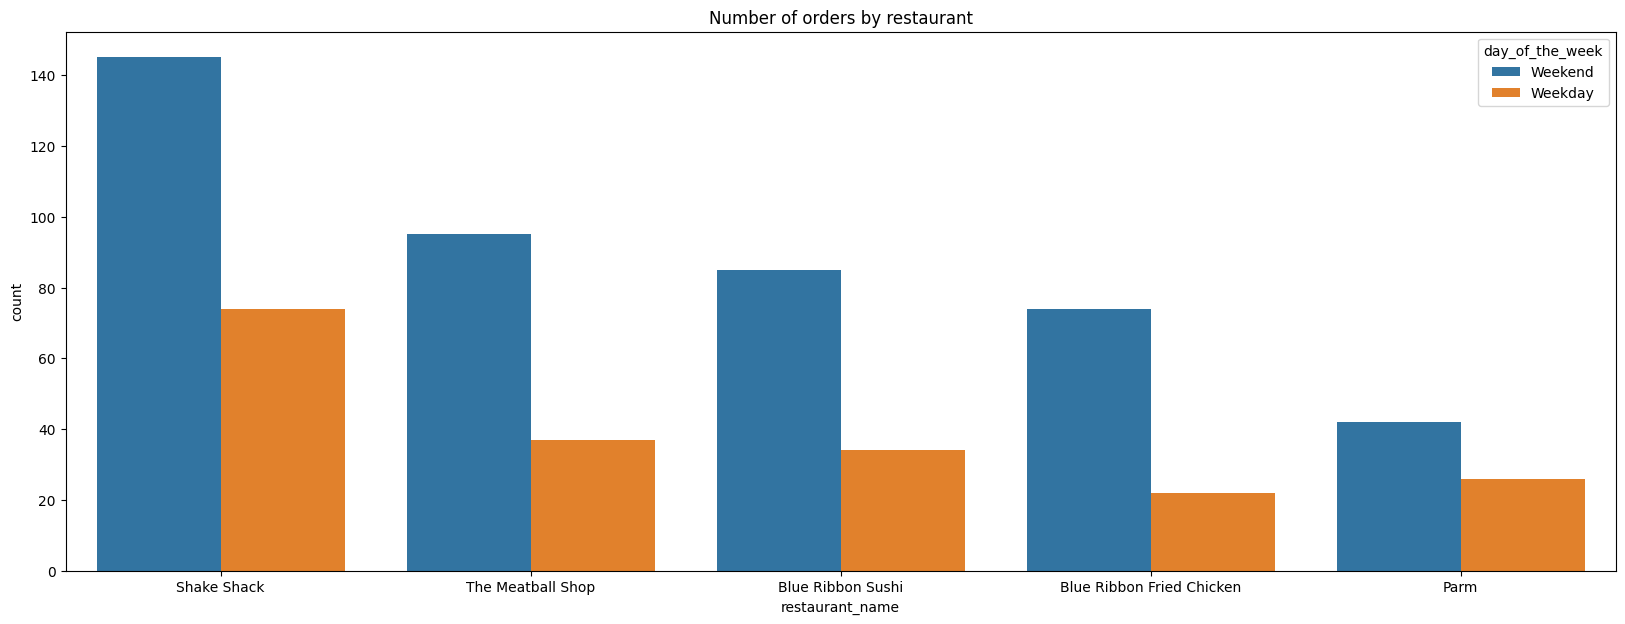

In [ ]:
plt.figure(figsize =(20,7))
sns.countplot(data =df, x ='restaurant_name', order =df['restaurant_name'].value_counts().head().index, hue ='day_of_the_week');
plt.title('Number of orders by restaurant')
plt.show()

OBSERVATIONS:
The number orders for the top restaurant almost doubles for these restaurants on weekends compared to weekdays.

CUISINE TYPE VS ORDER COST

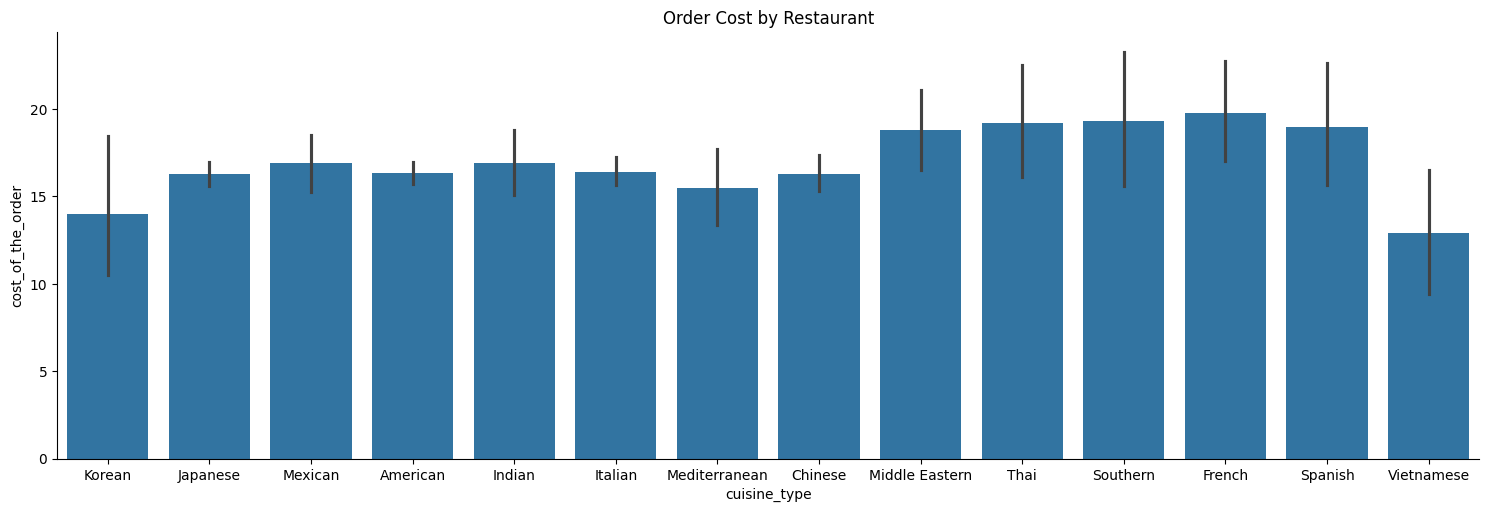

In [ ]:
sns.catplot( data =df, y ='cost_of_the_order', x ='cuisine_type', estimator ='mean', kind ='bar', height =5, aspect =3)
plt.title('Order Cost by Restaurant')
plt.show()

OBSERVATION:
MIDDLE EASTERN, THAI, SOUTHERN, FRENCH, AND SPANISH ARE THE TOP 5 CUISINES THAT HAVE THE HIGHEST ORDERING COSTS.

ORDERING COST VS RATING

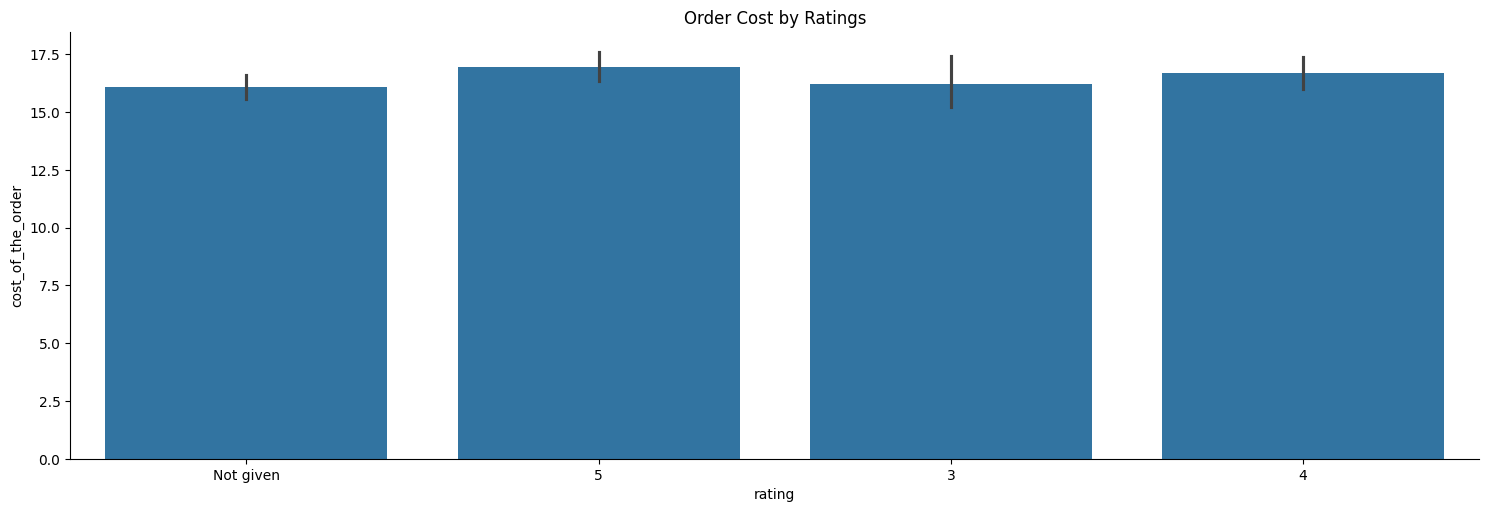

In [ ]:
sns.catplot( data =df, y ='cost_of_the_order', x ='rating', estimator ='mean', kind ='bar', height =5, aspect =3)
plt.title('Order Cost by Ratings')
plt.show()

OBSERVATIONS:
HIGHLY RATED RESTAURANTS TEND TO HAVE THE HIGHEST ORDERING COSTS.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
#Filter rated restaurants
df_rated = df[df.rating!='Not given'].copy()
#Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype(int)
#Create a new dataframe
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
#Restaurants with rating count over 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
#Filter to get the data of restaurants that have rating over 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
#Calculate mean rating for each restaurant
df_mean_4 = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
df_mean_4.head()


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
def compute_rev(x):
  if x>20:
    return x*0.25
  elif x>5:
    return x*0.15
  else:
    return 0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
#Calculate total delivery time
df['total_time']=df['food_preparation_time']+df['delivery_time']
#Percentage of orders with over 60 minutes of total delivery time
len(df[df.total_time>60])/len(df)*100



10.537407797681771

#### Observations:
About 10.53 percent of customers' orders take over 60 minutes in total delivery time


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
deliver_time_order = df.groupby(['day_of_the_week'])['delivery_time'].mean()
deliver_time_order

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [ ]:
print(f"The average delivery time of weekday orders is", round(deliver_time_order['Weekday'], 2), "minutes")
print (f"The average delivery time of weekend orders is",round(deliver_time_order['Weekend'],2), 'minutes')

The average delivery time of weekday orders is 28.34 minutes
The average delivery time of weekend orders is 22.47 minutes


#### Observations:
Deliveries during weekdays take, on average, almost 6 minutes longer than during weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* With 4.51 stars and 119 ratings, The Meatball Shop has the highest average rating.

* With an average rating of 4.22 stars, Blue Ribbon Sushi is also a popular choice among the mass.

* The most popular cuisines is American food.

* With 195 ratings and an average rating of 4.27, Shake Shack has the greatest weighted demand when both average rating and number of ratings are taken into account. This implies that, among the restaurants listed, Shake Shack is probably the most well-liked.

* Weekends tend to get more orders (almost double the number of orders) than weekdays.

### Recommendations:

*  Examine negative reviews to see what needs to be improved: To enhance the client experience, pay attention to what they dislike and fix those problems.

* For eateries with less ratings and those that are unrated, encourage more reviews to boost exposure and foster confidence with prospective clients. Email inquiries, social media campaigns, and in-store signage can all be used to do this.

* Promote positive aspects surrounding each cuisine type. For instance, American cuisine appears to be the most popular, it's important for restaurants to highlight the unique aspects of their particular cusine to make it stand out from their competitors.

* All things considered, restaurants may use these data to enhance patron satisfaction and draw in more business. Restaurants can improve the eating experience and attract repeat business by learning about client preferences, fixing any issues, and adjusting along the way.

In [ ]:
# Export Jupyter Notebook project file  into .html format
!jupyter nbconvert --to html 'foodhub_project_(Full_code_submission).ipynb'

[NbConvertApp] Converting notebook foodhub_project_(Full_code_submission).ipynb to html
[NbConvertApp] Writing 1137663 bytes to foodhub_project_(Full_code_submission).html
